**********************************************************************************************
# Creating Histograms of Landsat Images
Goal: The goal of this code is to create histograms from the raster values in Landsat images.
**********************************************************************************************

## Import Modules

In [1]:
import sys, os, glob
import numpy as np
from osgeo import gdal, gdalnumeric, ogr, osr
import matplotlib
import matplotlib.pyplot as plt

## Read in the composite landsat image
Read in the Landsat image

In [2]:
# Input the file path
filepath = r"C:\Users\19282\OneDrive\Documents\SSAI\Landsat\LC08_L1TP_052014_20180727_20180731_01_T1\LC08_L1TP_052014_20180727_20180731_01_T1.TIF"

# Open the file
raster = gdal.Open(filepath)

# Check type of the variable 'raster'
type(raster)

osgeo.gdal.Dataset

Read raster file properties

In [3]:
# Projection
raster.GetProjection()

# Dimensions
raster.RasterXSize
raster.RasterYSize

# Number of Bands
raster.RasterCount

11

## Delineate the raster file into bands and convert to numpy arrays

In [4]:
# for loop to assign the bands to a dictionary and change them into arrays
d = {}
for i in range(1,12):
    d["band" + str(i)] = raster.GetRasterBand(i)
    d["band" + str(i)] = d["band" + str(i)].ReadAsArray()

print(d["band3"])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [5]:
# Testing process out of a loop
band1 = raster.GetRasterBand(1)
band1 = band1.ReadAsArray()
band1.shape

(8281, 8221)

## Create the Histogram

C:\Users\19282\anaconda3\envs\sentinel\lib\site-packages\matplotlib\axes\_axes.py:6731: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\19282\anaconda3\envs\sentinel\lib\site-packages\matplotlib\axes\_axes.py:6732: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0.10177993, 0.20790261, 0.31402528, 0.42014796, 0.5262706 ,
        0.6323933 , 0.738516  , 0.84463865, 0.9507613 , 1.0568839 ,
        1.1630067 ], dtype=float32),
 <a list of 8221 BarContainer objects>)

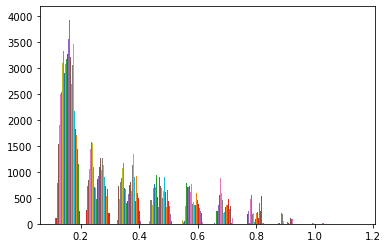

In [6]:
# Testing process out of loop

#plt.title("Band1")
plt.hist(band1)
#plt.savefig("histogram_band1")